In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [84]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
data = pd.read_csv('/content/drive/MyDrive/Semester 7/Machine Learning/Midterm/winequality-red.csv')

In [86]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
data.shape

(1599, 12)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
dub_data=data.copy()
dub_data.drop_duplicates(subset=None,inplace=True)

In [91]:
dub_data.shape

(1359, 12)

In [92]:
data = dub_data

The shape after running the drop duplicate command is not same as the original dataframe.Hence we can conclude that there were duplicate values in the dataset.


In [93]:
#plit data
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

# print(x)

#split data available and inbox
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# #split train and test from available data
# x_train,x_test,y_train,y_test = train_test_split(x_available, y_available, test_size=0.2, random_state = 1)

- corr : compute pairwise correlation of columns, excluding NA/null values.

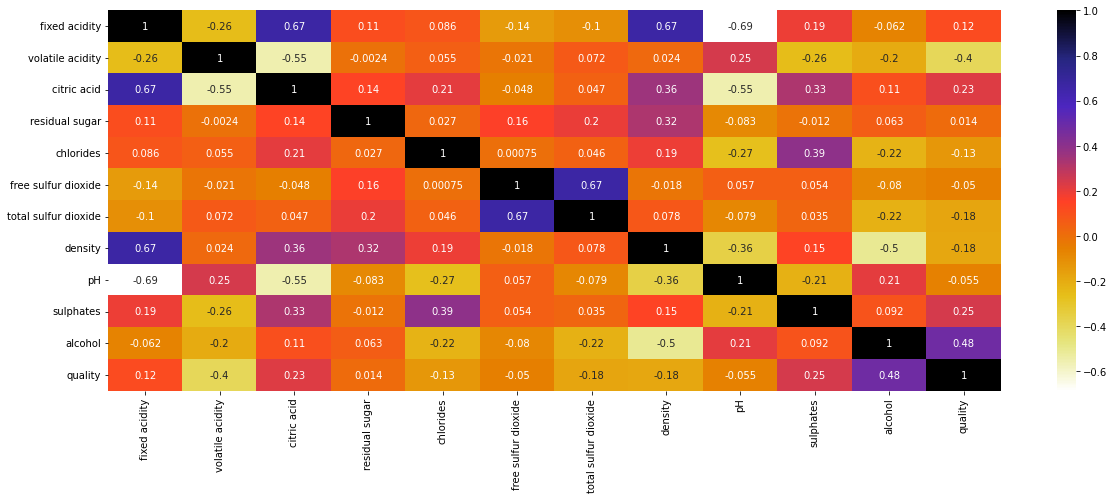

In [94]:
import seaborn as sns
x_train.shape
plt.figure(figsize=(20,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [95]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [96]:
corr_feature_1 = correlation(x_train, 0.6)
print(len(set(corr_feature_1)))
corr_feature_1

4


{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [97]:
corr_feature_2 = correlation(x_train, 0.4)
print(len(set(corr_feature_2)))
print(corr_feature_2)

5
{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid'}


In [98]:
corr_feature_3 = correlation(x_train, 0.3)
print(len(set(corr_feature_3)))
print(corr_feature_3)

6
{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid', 'sulphates'}


In [99]:
corr_feature_4 = correlation(x_train, 0.2)
print(len(set(corr_feature_4)))
print(corr_feature_4)

7
{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid', 'volatile acidity', 'sulphates'}


- LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [100]:
linearR = LinearRegression()

- Mean Absolute Error calculates the average difference between the calculated values and actual values. It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale. It is used as evaluation metrics for regression models in machine learning. It calculates errors between actual values and values predicted by the model. It is used to predict the accuracy of the machine learning model

In [101]:
#corr_feature 1
#{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

#data 1
x_test_1 = x_test.drop(corr_feature_1, axis=1)
x_train_1 = x_train.drop(corr_feature_1, axis=1)

#train model
linearR.fit(x_train_1, y_train)

#predict
y_pre=linearR.predict(x_test_1)

#caculate mean absolute err
mae_1 = mae(y_test, y_pre)

linearR.score(x_test_1, y_test)

0.26786962629755096

In [102]:
# corr_feature 2. 
#{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid'}

#data 2
x_test_2 = x_test.drop(corr_feature_2, axis=1)
x_train_2 = x_train.drop(corr_feature_2, axis=1)

linearR.fit(x_train_2, y_train)
y_pre=linearR.predict(x_test_2)

mae_2 = mae(y_test, y_pre)
linearR.score(x_test_2, y_test)
print(mae_2)

0.5712889418099258


In [103]:
#corr_feature 3
#{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid', 'sulphates'}

#data 3
x_test_3 = x_test.drop(corr_feature_3, axis=1)
x_train_3 = x_train.drop(corr_feature_3, axis=1)

linearR.fit(x_train_3, y_train)
y_pre=linearR.predict(x_test_3)

mae_3 = mae(y_test, y_pre)
linearR.score(x_test_3, y_test)

0.1170880729619369

In [104]:
#corr_feature 4
#{'alcohol', 'density', 'total sulfur dioxide', 'pH', 'citric acid', 'volatile acidity', 'sulphates'}

#data 4
x_test_4 = x_test.drop(corr_feature_4, axis=1)
x_train_4 = x_train.drop(corr_feature_4, axis=1)

linearR.fit(x_train_4, y_train)
y_pre = linearR.predict(x_test_4)

linearR.score(x_test_4, y_test)
mae_4 = mae(y_test, y_pre)


In [105]:
from prettytable import PrettyTable
models_score = PrettyTable()
models_score.add_column("Data set",["data 1","data 2","data 3","data 4"])
models_score.add_column("Mean Absolute Error",[mae_1,mae_2,mae_3,mae_4])

print(models_score)

+----------+---------------------+
| Data set | Mean Absolute Error |
+----------+---------------------+
|  data 1  |  0.5243405332128019 |
|  data 2  |  0.5712889418099258 |
|  data 3  |  0.5881102207980105 |
|  data 4  |  0.632883311939493  |
+----------+---------------------+
